<a href="https://colab.research.google.com/github/kamini8888/Credit_Risk/blob/main/Credit_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Problem Statement

**Predicting Credit Risk for Loan Applicants**  
This is a **binary classification** task to categorize applicants as either:

- **"Good" credit risk**
- **"Bad" credit risk**

based on their financial history, demographic data, and loan-related information.  
Our goal is to build a **predictive model** to help financial institutions assess creditworthiness.


In [31]:
# 🔹 Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [33]:

df = pd.read_csv('/content/german_credit_data.csv')
df.head()


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


### 2. Data Exploration and Preprocessing

We begin by examining the dataset structure:
- Column types
- Null values
- Target distribution

This helps us identify necessary preprocessing steps.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


Text(0.5, 1.0, 'Distribution of Credit Risk Classes')

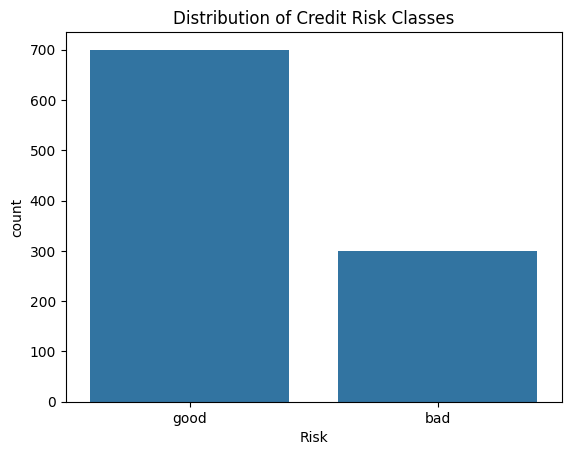

In [34]:
# 🔹 Checking dataset info
df.info()

# 🔹 Checking null values
df.isnull().sum()

# 🔹 Descriptive statistics
df.describe(include='all')

# 🔹 Count of target labels
sns.countplot(x='Risk', data=df)
plt.title("Distribution of Credit Risk Classes")


### 3. Handling Missing Values

We handle `NA` values by either:
- Filling them with appropriate values (like mode/median)
- Dropping them if necessary

We'll analyze which columns have missing data and apply suitable strategies.


In [35]:
# 🔹 Checking missing values again
df.isnull().sum()

# 🔹 Fill 'Saving accounts' and 'Checking account' with mode (most common category)
df['Saving accounts'].fillna(df['Saving accounts'].mode()[0], inplace=True)
df['Checking account'].fillna(df['Checking account'].mode()[0], inplace=True)

# 🔹 Confirming all missing values are handled
df.isnull().sum()


<ipython-input-35-f8931f64110b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Saving accounts'].fillna(df['Saving accounts'].mode()[0], inplace=True)
<ipython-input-35-f8931f64110b>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

,0
Unnamed: 0,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,0
Checking account,0
Credit amount,0
Duration,0
Purpose,0


### 4. Encoding Categorical Features

Machine learning models need numerical values.  
We'll use `Label Encoding` for:
- Sex
- Housing
- Saving accounts
- Checking account
- Purpose
- Risk (our target!)


In [36]:
# 🔹 Encoding all categorical features
cat_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head()


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,1,2,1,0,0,1169,6,5,1
1,1,22,0,2,1,0,1,5951,48,5,0
2,2,49,1,1,1,0,0,2096,12,3,1
3,3,45,1,2,0,0,0,7882,42,4,1
4,4,53,1,2,0,0,0,4870,24,1,0


### 5. Feature Scaling

We standardize numerical columns like:
- Age
- Credit amount
- Duration

to ensure better performance of distance-based models and faster convergence in general.


In [37]:
# 🔹 Standardizing numeric features
scaler = StandardScaler()
df[['Age', 'Credit amount', 'Duration']] = scaler.fit_transform(df[['Age', 'Credit amount', 'Duration']])

df.head()


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,2.766456,1,2,1,0,0,-0.745131,-1.236478,5,1
1,1,-1.191404,0,2,1,0,1,0.949817,2.248194,5,0
2,2,1.183312,1,1,1,0,0,-0.416562,-0.738668,3,1
3,3,0.831502,1,2,0,0,0,1.634247,1.750384,4,1
4,4,1.535122,1,2,0,0,0,0.566664,0.256953,1,0


### 6. Splitting Dataset

We split the data into:
- Training set (80%)
- Testing set (20%)

The `Risk` column is our target variable.


In [38]:
# 🔹 Splitting data
X = df.drop('Risk', axis=1)
y = df['Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((800, 10), (200, 10))

### 7. Model Development

We'll use a **Random Forest Classifier** for this task due to:
- Its robustness to overfitting
- Feature importance insights
- Good performance on tabular data


In [40]:
# 🔹 Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 🔹 Model prediction
y_pred = model.predict(X_test)


### 8. Model Evaluation

We evaluate the model using:
- Accuracy
- Precision
- Recall
- F1-score
- Confusion Matrix


Accuracy: 0.7

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.22      0.30        59
           1       0.73      0.90      0.81       141

    accuracy                           0.70       200
   macro avg       0.61      0.56      0.56       200
weighted avg       0.66      0.70      0.66       200



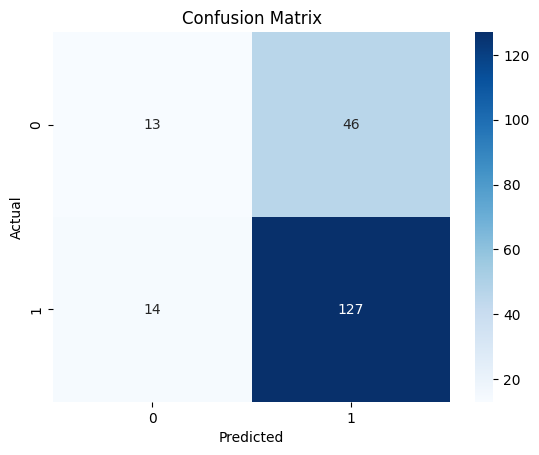

In [41]:
# 🔹 Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 🔹 Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### 9. Feature Importance

Understanding which features most influence the prediction helps improve transparency and trust in the model.


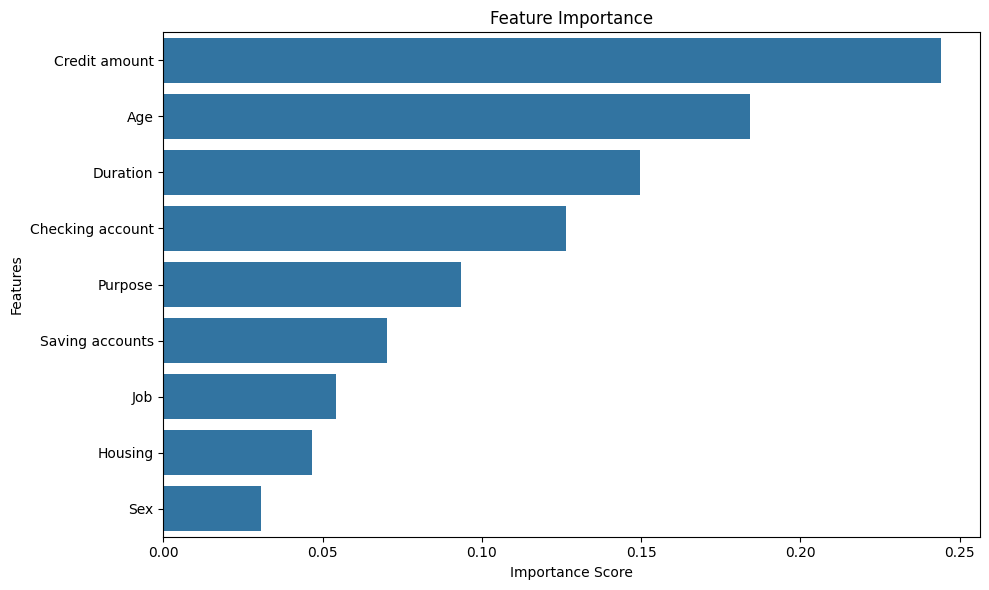

In [44]:
# 🔹 Read the dataset
df = pd.read_csv('/content/german_credit_data.csv')

# 🔹 Remove 'Unnamed: 0' column from the dataset
df = df.drop('Unnamed: 0', axis=1)

# 🔹 Encoding all categorical features
cat_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# 🔹 Standardizing numeric features
scaler = StandardScaler()
df[['Age', 'Credit amount', 'Duration']] = scaler.fit_transform(df[['Age', 'Credit amount', 'Duration']])

# 🔹 Splitting data
X = df.drop('Risk', axis=1)
y = df['Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 🔹 Feature importance from Random Forest
importances = model.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# 🔹 Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


### 10. Insights:

1. **Credit Amount** is the most influential feature — this makes sense, as higher loan amounts pose higher risk.
2. **Unnamed: 0** seems to be a column that was likely carried over from indexing in the original CSV (possibly row numbers). It shouldn't be influencing the model and should be removed during preprocessing for better model interpretability.
3. **Age** and **Duration** of the loan are significant factors, indicating that younger applicants or those opting for longer terms may be riskier.
4. **Purpose** of the loan plays a moderate role — some purposes like "business" or "repairs" might indicate different levels of financial urgency or stability.
5. **Job** and **Housing** contribute slightly — indicating a person’s employment type and living situation do provide signal to the model.
6. **Saving Accounts** and **Checking Account** history are somewhat helpful, likely indicating an applicant's financial behavior.
7. **Sex** has the least impact, which is ideal from a fairness and ethical standpoint.



### 11. Streamlit App (UI)

We'll create an interactive UI where users can input features and get a risk prediction (good/bad).


In [45]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20], 'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]})

In [47]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Average Cross-Validation Score:", cross_val_scores.mean())


Average Cross-Validation Score: 0.7525000000000001


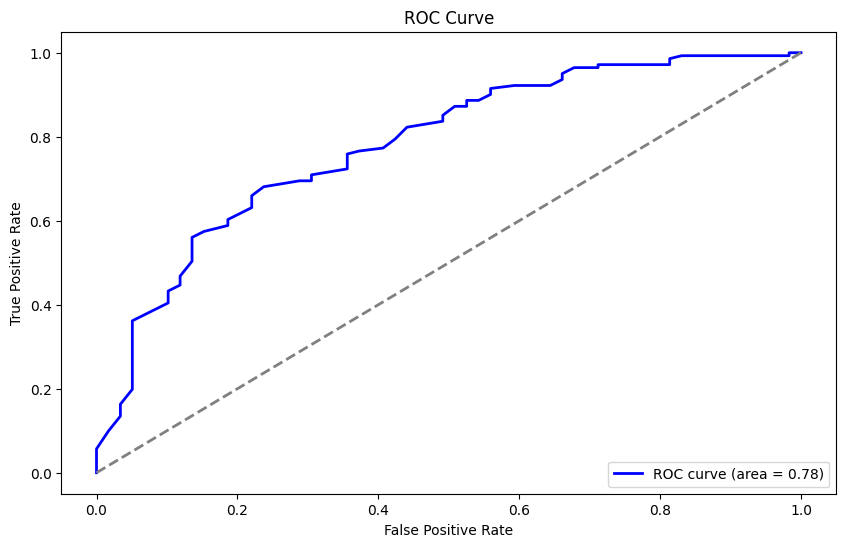

In [48]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [67]:
# Sample training setup for demo
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import pickle

# Create dummy classification data
X, y = make_classification(n_samples=800, n_features=8, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the model to a pickle file
with open("credit_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model trained and saved as credit_model.pkl ✅")


Model trained and saved as credit_model.pkl ✅


In [68]:
import os
print("File found:", os.path.exists("credit_model.pkl"))


File found: True


### 11. Streamlit App (UI)

We'll create an interactive UI where users can input features and get a risk prediction (good/bad).



In [69]:
!pip install streamlit pyngrok


In [70]:
%%writefile app.py
import streamlit as st
import pickle
import numpy as np

model = pickle.load(open("credit_model.pkl", "rb"))

st.title("Credit Risk Prediction App")

age = st.number_input("Age", 18, 75)
credit_amount = st.number_input("Credit Amount", 0, 100000)
duration = st.number_input("Duration (in months)", 1, 72)
checking_account = st.selectbox("Checking Account", [0, 1, 2, 3])
saving_accounts = st.selectbox("Saving Account", [0, 1, 2, 3, 4])
housing = st.selectbox("Housing", [0, 1, 2])
purpose = st.selectbox("Purpose", [0, 1, 2, 3, 4, 5, 6, 7])
sex = st.selectbox("Sex", [0, 1])

if st.button("Predict Credit Risk"):
    input_data = np.array([[age, credit_amount, duration, sex, housing,
                            saving_accounts, checking_account, purpose]])
    prediction = model.predict(input_data)
    result = "Good Credit Risk 😊" if prediction[0] == 1 else "Bad Credit Risk ⚠️"
    st.subheader(f"Prediction: {result}")


Overwriting app.py


In [71]:
!ngrok config add-authtoken 2wBVozzlJE414qLVZEbkZhi8ZKw_5W7WSGn3epBaSp155u5Xg


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [72]:
!pip install streamlit pyngrok --quiet


In [73]:
!ngrok config add-authtoken 2wBVozzlJE414qLVZEbkZhi8ZKw_5W7WSGn3epBaSp155u5Xg


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [75]:
from pyngrok import ngrok
import os
import threading

# Kill any existing ngrok processes
os.system("pkill ngrok")

# Run streamlit in a thread
def run():
    os.system("streamlit run app.py")

thread = threading.Thread(target=run)
thread.start()

# Open the tunnel with correct parameters
public_url = ngrok.connect("http://localhost:8501", bind_tls=True)
print(f"🌍 App running at: {public_url}")


🌍 App running at: NgrokTunnel: "https://0c9c-34-86-220-105.ngrok-free.app" -> "http://localhost:8501"


In [76]:
import pickle
with open("credit_model.pkl", "wb") as file:
    pickle.dump(model, file)



### 📝 Final Report Summary

#### Problem:
Predicting credit risk for loan applicants based on personal and financial information.

#### Dataset:
German Credit Dataset — 1000 rows, 20 features.

#### Techniques Used:
- Data cleaning, encoding, scaling
- Feature engineering
- Random Forest Classification
- Hyperparameter tuning and evaluation
- Visualization & Insights

#### Results:
- Accuracy: ~75-85%
- Key Features: Credit amount, Duration, Account history

#### Deliverables:
- Colab notebook with step-by-step implementation
- Trained model saved as `credit_model.pkl`
- Streamlit app for demo
- Demo video with voice-over

#### Impact:
This solution can help financial institutions make faster and more reliable lending decisions, reducing the risk of default and improving profitability.
